# Step 1: Collecting Raw Data



In [1]:
#pip install pyspellchecker
#pip install fuzzywuzzy
#pip install python-Levenshtein
#conda install -c conda-forge spacy
#pip install -U pip setuptools wheel
#pip install -U spacy
#!python3 -m spacy download en_core_web_sm

#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en
#!pip list 

# for keeping track of timing
import datetime as dt


# for building in wait times
import random
import time


from google_play_scraper import app
from google_play_scraper import Sort, reviews
from google_play_scraper import reviews_all
from google_play_scraper import permissions

from spellchecker import SpellChecker
from textblob import TextBlob

import spacy  
from spacy.lang.en import English

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('punkt')


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
  
import re

import pandas as pd


Apps under consideration:
1. Ebay
2. Hinge
3. Facebook
4. Whisper
5. SkyScanner
6. Uber
7. Automatic Call Recorder
8. Among Us
9. AccuWeather
10. McDonalds

phishing, malware, adware, victim, unethical, ethical, pirated, stole, steal, virus




app_id=[
        'com.ebay.mobile',
        'co.hinge.app',
        'net.slideshare.mobile',
        'sh.whisper',
        'net.skyscanner.android.main',
        'com.ubercab',
        'com.wb.headsup',
       'com.hellotalk',
       'com.accuweather.android',
       'com.coinbase.android'
       ]

app_nm=[
    'Shopping - EBay',
    'Dating - Hinge',
    'Business - SlideShare',
    'Social - Whisper',
    'Travel and Local - Skyscanner',
    'Maps and Navigation - Uber',
    'Words - Heads Up',
    'Educational - HelloTalk',
    'Weather - AccuWeather',
    'Finance - Coinbase '
    ]

### Google Play Scraper Paraphrase
1. The reviews function returns 2 variables. 
2. The first variable is the review data we’re after. 
2. The second variable is a token.
4. It has information we need if we want to keep scraping more than count number of reviews.
5. Setting count too high can cause problems. As maximum number of reviews per page supported by Google Play is 200

link: [https://python.plainenglish.io/scraping-storing-google-play-app-reviews-with-python-5640c933c476] 

### Collect App Information Like
1. 1App Title
2. 2App Description
4. 4App Summary
6. 6App Installs
7. 7App Score
8. 8App Rating
9. 9App Reviews
10. 10App Histogram
44. 44Version
45. 45Recent Changes
48. 48App ID

##Loop through app IDs to get app info
app_info = []
info={}
for i in app_id:
    print(i)
    info=app(i)
    del info['comments']
    print(info)
    app_info.append(info)
    print('\n')

info_df = pd.DataFrame(app_info)

print(info_df)

print(info_df.columns)

print(app_info)
#print(info_df)


### Code for Collecting 250 app reviews at a time (10 times) for 10 different apps

Run this once and store in an excel file

df=pd.DataFrame()
##Loop through apps to get reviews
for app_nm, app_id in zip(app_nm, app_id):
    
    # Get start time
    start = dt.datetime.now()
    fmt= "%m/%d/%y - %T %p"    
    
    # Print starting output for app
    print('---'*20)
    print('---'*20)    
    print(f'***** {app_nm} started at {start.strftime(fmt)}')
    print()
    
    # Empty list for storing reviews
    app_reviews = []
    
    # Number of reviews to scrape per batch
    count = 350
    
    # To keep track of how many batches have been completed
    batch_num = 0
    rvws, token = reviews(
              app_id,           # found in app's url
              lang='en',        # defaults to 'en'
              country='us',     # defaults to 'us'
              sort=Sort.NEWEST, # start with most recent
              count=count       # batch size
          )
    
    # For each review obtained
    for r in rvws:
        r['app_name'] = app_nm # add key for app's name
        r['app_id'] = app_id     # add key for app's id
        # Increase batch count by one        
    app_reviews.extend(rvws)
    
    
    for batch_num in range(1, 10): #3500 reviews from each app
    
        rvws, token = reviews(
              app_id,           # found in app's url
              continuation_token=token # batch size
          )
        # For each review obtained
        for r in rvws:
            r['app_name'] = app_nm # add key for app's name
            r['app_id'] = app_id     # add key for app's id
        # Increase batch count by one
        
        app_reviews.extend(rvws)
        #print(app_reviews)
        batch_num +=1 
        print(f'Batch {batch_num} completed.')

        #Wait 1 to 5 seconds to start next batch
        time.sleep(random.randint(1,2))
        
    df=df.append(app_reviews)
    

### Store scrapped reviews in an Excel File:

#df = pd.DataFrame(rvws)
print(df.shape)
df_35K_reviews.to_excel("All_Reviews_35K.xlsx")

# ####################### ! START HERE !! ! ###########################!

IMPORTING PACKAGES FOR PREPROCESSING....

In [2]:
#pip install pyspellchecker
#pip install fuzzywuzzy
#pip install python-Levenshtein
#conda install -c conda-forge spacy
#pip install -U pip setuptools wheel
#pip install -U spacy
#!python3 -m spacy download en_core_web_sm

#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en
#!pip list 

# for keeping track of timing
import datetime as dt
import numpy as np

# for building in wait times
import random
import time


from google_play_scraper import app
from google_play_scraper import Sort, reviews
from google_play_scraper import reviews_all
from google_play_scraper import permissions

from spellchecker import SpellChecker
from textblob import TextBlob

import spacy  
from spacy.lang.en import English

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('punkt')


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
  

import re
import pandas as pd


### Code for Loading the Reviews from Excel File:

df_35K_reviews=pd.read_excel("All_Reviews_35K.xlsx", keep_default_na=False)

df_35K_reviews_COPY=df_35K_reviews.copy(deep=True) # making a copy of the data frame df

#ANY NULL VALUES IN THE DATA?

df_35K_reviews_COPY.isnull().sum()


#CODE FOR FILLING NA VALUES IN CONTENT COLUMN WITH NO COMMENT

#df_35K_reviews_COPY['content'] = df_35K_reviews_COPY['content'].fillna('No Comment')


# Step 2: Pre-processing Raw Data
1. Removing spelling errors
2. Sentiment Analysis
2. Remove Stop Words
3. Stemming / Lemmetization


### i. Spell Check Using SpellChecker (not Jamspell)

1. To achieve the best qualityg corrections dictionary-based methods are not enough. 
2. You need to consider the word surroundings. 
3. JamSpell is based on a language model. 
4. It makes different corrections for a different context.

#FUNCTION FOR SPELL CHECKING

counter=0

def spell_check(user_rvw):
    global counter
    
    #print(f'Original Comment: {user_rvw} -->')
    spell = SpellChecker()
    
    words = spell.split_words(user_rvw)
    
    words=[spell.correction(word) for word in words]
    
    user_rvw = " ".join(words)
    
    user_rvw = user_rvw.strip()
    
    #print(f'Spell-Checked Comment: {user_rvw}\n')
    
    #textBlb = TextBlob(user_rvw)  # Making textblob
    
    #user_rvw= str(textBlb.correct())   # Correcting the text
    
    counter = counter+1
    if counter%100==0:
        print (f"{counter} rows spell checked \n")
    
    return user_rvw


#CALLING SPELL CHECKER ON CONTENT and STORING IN CONTENT_CLEANED

df_35K_reviews_COPY['content_cleaned'] = df_35K_reviews_COPY['content'].apply(spell_check)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(df_35K_reviews_COPY['content_cleaned'])




df_35K_reviews_COPY.to_excel("All_Reviews_35K_Content_Cleaned_Spell_Checked.xlsx")

### 2. Sentiment Analysis

Filtering messages to get reviews with only negative sentiments in data frame "neg_user_reviews"

Storing neutral and positive reviews in "neut_posi_user_reviews"

df_35K_reviews_COPY=pd.read_excel("All_Reviews_35K_Content_Cleaned_Spell_Checked.xlsx")

df_35K_reviews_COPY.columns




#FUNCTION FOR SENTIMENT ANALYSIS

def sentiment_scores(comment):
    
    if type(comment) != str:
        comment=" "
 
    sid_obj = SentimentIntensityAnalyzer()
 
    sentiment_dict = sid_obj.polarity_scores(comment)
     
    # sentiment_dict['neg'], sentiment_dict['neu'],sentiment_dict['pos']
 
    p=sentiment_dict['compound']
    
    print(f'Comment: {comment} --> Score: {p} \n')
    
    
    return p
 


df_35K_reviews_COPY['content_sentiment'] = df_35K_reviews_COPY['content_cleaned'].apply(sentiment_scores)

#Extracting Negative Reviews neg_user_reviews

neg_user_reviews=df_35K_reviews_COPY[df_35K_reviews_COPY['content_sentiment'] <= -0.05].copy(deep=True)


neg_user_reviews.shape

posi_user_reviews=df_35K_reviews_COPY[df_35K_reviews_COPY["content_sentiment"] > 0.05].copy(deep=True)

posi_user_reviews.shape

#FUNCTION TO PRINT A COLUMN OF A DATAFRAME

def print_df(user_rvw):
    print(user_rvw)
    print('\n')
    
   

In [4]:
#PRINTING THE NEGATIVE REVIEWS

#neg_user_reviews['content_cleaned'].apply(print_df)

#SELECTING 2866 (1433 x 2 = 2866) triple of the required zero label comments considering some will have #%string match

zero_label_reviews=posi_user_reviews.sample(n=4299)

### 2. Lemmetization using WordNet

def decontracted(phrase):
    if type(phrase) != str:
        return(" ")
 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

##DECONTRACTING THE PHRASES BEFORE LEMMATISATION


neg_user_reviews['content_cleaned'] = neg_user_reviews['content_cleaned'].apply(decontracted)



zero_label_reviews['content_cleaned'] = zero_label_reviews['content_cleaned'].apply(decontracted)


counter=0


def lemmetizer(user_rvw):
    
    global counter
    
    if type(user_rvw) != str:
        return(" ")
 

    #set(stopwords.words('english'))

    text = user_rvw
    
    #stop_words = set(stopwords.words('english')) 
  
    word_tokens = word_tokenize(text) 
    
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if True:# w not in stop_words: 
            filtered_sentence.append(w) 
    #print(filtered_sentence) 

    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    #print(f'{user_rvw} ---> {lemma_word}')
    #print('\n')
    
    user_rvw = " ".join(lemma_word)
    
    user_rvw = user_rvw.strip()
    
    counter = counter+1
    if counter%1000==0:
        print (f"{counter} rows lemmatized \n")
        print(f'{user_rvw} ---> {lemma_word}')
        print('\n')
    
    
    
    return user_rvw
    
    




neg_user_reviews['content_cleaned'] = neg_user_reviews['content_cleaned'].apply(lemmetizer)





zero_label_reviews['content_cleaned'] = zero_label_reviews['content_cleaned'].apply(lemmetizer)


'''with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(df_head['content_cleaned'])'''

print(neg_user_reviews['content_cleaned'])


### 3. Removing Stop-Words Using Spacy

1. Stopwords are removed from the given text so that more focus can be given to words which define the meaning of the text.

2. Key benefits of removing stopwords:dataset size decreases and the time to train the model also decreases

3. There are fewer and only meaningful tokens left. Thus, it could increase classification accuracy
    

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
    
counter=0

def stop_word_remover(user_rvw):
    
    global counter
 
    """# Load English tokenizer, tagger, parser, NER and word vectors
    nlp = English()

    text = user_rvw
    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    from spacy.lang.en.stop_words import STOP_WORDS

    # Create list of word tokens after removing stopwords
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    #print(f"{token_list} \n ---> {filtered_sentence}\n")
    
    user_rvw = " ".join(filtered_sentence)"""
    
    stop_words = stopwords.words('english')
    
    stop_words.remove('not')
    stop_words.remove('no')
    stop_words.remove('until')
    stop_words.remove('over')
    stop_words.remove('against')
    stop_words.remove('above')
    stop_words.remove('below')
    stop_words.remove('while')
 
    word_tokens = word_tokenize(user_rvw)
 
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
 
    print(word_tokens)
    print(filtered_sentence)
    print("\n")
    
    user_rvw = " ".join(filtered_sentence)
    
    user_rvw=user_rvw.lower()
    
    counter = counter+1
    if counter%1000==0:
        print (f"{counter} rows stopword removed \n")
        print(f"{token_list} \n ---> {filtered_sentence}\n")
        print('\n')
    
    
    
    
    
    return user_rvw
 

   

neg_user_reviews['content_cleaned'] = neg_user_reviews['content_cleaned'].apply(stop_word_remover)



   

zero_label_reviews['content_cleaned'] = zero_label_reviews['content_cleaned'].apply(stop_word_remover)

'''with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(df_head['content_cleaned'])'''

    
print(neg_user_reviews['content_cleaned'])

# Step 3: String Matching to Detect Keywords in Dataset 

Not Using FuzzyWuzzy

1. Paraphrase all. The Levenshtein distance is a metric to measure how apart are two sequences of words. 
2. It measures the minimum number of edits that you need to do to change a one-word sequence into the other. 
3. These edits can be insertions, deletions or substitutions. 
4. Get the similarity score of two strings by using two methods ratio() or partial_ratio()
5. fuzz.ratio() calculates the edit distance in both input strings using the difflib.ratio
 


#import re

keywords=list(line.strip() for line in open('TransparencyKeywords.txt'))

keywords

def keyword_check(user_rvw):
    
    user_words=user_rvw.split()
    print(user_words)
    
    
    #print(keywords)
    
    kw_count=0 #for each user review
    uw_count=len(user_words)
    
    print(f"Length={uw_count}")
    
    """for key_w in keywords:
        for user_w in user_words:
            if key_w==user_w: #a key word matched
                kw_count=kw_count+1"""
    
        
    for key_w in keywords:
        c=0
        c=user_rvw.count(key_w)
        kw_count=kw_count+c
        if c > 0:
            print(f"Keyword: {key_w}")
    
    
    
    if uw_count==0:
        print("Percentage Match: 0\n")
        return 0
    else:
        score=(kw_count/uw_count)*100
        print(f"Percentage Match: {score}\n")
        return score
                

neg_user_reviews['keyword_match_score'] = neg_user_reviews['content_cleaned'].apply(keyword_check)

#keyword_check("Overall good expieriance app")



zero_label_reviews['keyword_match_score'] = zero_label_reviews['content_cleaned'].apply(keyword_check)



zero_label_reviews.to_excel("Zero_Label_Reviews.xlsx")

In [4]:

zero_label_reviews=pd.read_excel("Zero_Label_Reviews.xlsx")


zero_label_reviews=zero_label_reviews[zero_label_reviews['keyword_match_score']<3].sample(1433)



'''with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(df_head['keyword_match_score'])'''

    
print(neg_user_reviews['keyword_match_score'])

neg_user_reviews[neg_user_reviews['keyword_match_score']>3].content

df_honesty_rvw=neg_user_reviews[neg_user_reviews['keyword_match_score']>3]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(df_honesty_rvw.content)



df_honesty_rvw['content'].apply(print_df)

df_honesty_rvw.shape

#df_honesty_rvw.to_excel("Reviews_About_App_Honesty.xlsx")

df_honesty_rvw.to_excel("Reviews_About_App_Honesty_.xlsx") #THIS FILE CONTAINS THE UNLABELLED DATA

## This file "Reviews_About_App_Honesty.xlsx" has been labelled by the team.

1. Reviews_About_App_Honesty_.xlsx contains the unlabelled but cleaned data (spelling, sentiment, lemmatized)
2. Only comments labelled "1" are selected
3. 1433 comments were selected from the reviews detected on sentiment analysis during string matching are selected from the original df
4. content_cleaned, content_sentiment and label columns were selected.

# Step 3.5 Extracting relevant columns for preprocessing, "content_cleaned", "" and "label" for 1 label reviews

The file Honesty_Related_App_Reviews has the labelled reviews



In [5]:
df=pd.read_excel("Reviews_About_App_Honesty.xlsx")

labelled_reviews = df[['content_cleaned', 'label (1/0)', 'content_sentiment']] #contains on the comments and the labels

labelled_reviews = labelled_reviews.rename(columns={'content_cleaned': 'content_cleaned', 'label (1/0)': 'label'}) #renaming the cols

one_label_reviews_filtered = labelled_reviews[labelled_reviews['label']==1]

/Users/saumyahome/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
one_label_reviews_filtered.shape

(1495, 3)

In [7]:
zero_label_reviews_filtered = zero_label_reviews[['content_cleaned', 'content_sentiment']] #contains on the comments and the labels

zero_label_reviews_filtered = zero_label_reviews_filtered.rename(columns={'content_cleaned': 'content_cleaned', 'label (1/0)': 'label'}) #renaming the cols

zero_label_reviews_filtered['label']=0

zero_label_reviews_filtered.shape

(1433, 3)

In [8]:
data=pd.concat([one_label_reviews_filtered,zero_label_reviews_filtered]) # WORD CLOUD

data.shape

(2928, 3)

# Step: 4 Post Labelling: Splitting into Train / Test



IMPORTING ALL PACKAGES RELATED TO VECTORISATION...

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import pickle

In [10]:

X_train, X_test, Y_train, Y_test = train_test_split(data, data['label'], test_size = 0.20, stratify = data['label'], random_state = 0)



In [11]:
X_train.drop(['label'] ,  axis = 1, inplace = True)
X_test.drop(['label'] ,  axis = 1, inplace = True)

/Users/saumyahome/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
X_train.columns


Index(['content_cleaned', 'content_sentiment'], dtype='object')

# Step: 5 Preprocessing Before Vectorization

In [13]:
normalizer = Normalizer()

normalizer.fit(X_train['content_sentiment'].values.reshape(-1, 1))

sent_train = normalizer.transform(X_train['content_sentiment'].values.reshape(-1, 1))

sent_test = normalizer.transform(X_test['content_sentiment'].values.reshape(-1, 1))

print('Normalisation of sentiment in train data', sent_train.shape, Y_train.shape)

print('Normalisation of sentiment in test data', sent_test.shape, Y_test.shape)


Normalisation of sentiment in train data (2342, 1) (2342,)
Normalisation of sentiment in test data (586, 1) (586,)


## Creating a corpus of review from pretrained Glove Model

In [16]:
# def loadGloveModel(gloveFile):
#     print ("Loading Glove Model")
#     f = open(gloveFile,'r', encoding="utf8")
#     model = {}
#     for line in tqdm(f):
#         splitLine = line.split()
#         word = splitLine[0]
#         embedding = np.array([float(val) for val in splitLine[1:]])
#         model[word] = embedding
#     print ("Done.",len(model)," words loaded!")
#     return model

In [17]:
# model = loadGloveModel('glove.42B.300d.txt')

# # Loading Glove Model
# # 1917494it [09:17, 3441.54it/s]
# # Done. 1917494  words loaded!

# corpus = X_train["content_cleaned"]
# words = []
# for i in corpus:
#     words.extend(i.split(' '))

# print("all the words in the coupus", len(words))
# words = set(words)
# print("the unique words in the coupus", len(words))

# inter_words = set(model.keys()).intersection(words)
# print("The number of words that are present in both glove vectors and our coupus", \
#       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

# words_corpus = {}
# words_glove = set(model.keys())
# for i in words:
#     if i in words_glove:
#         words_corpus[i] = model[i]
# print("word 2 vec length", len(words_corpus))

In [16]:
# import pickle
# with open('glove_vectors', 'wb') as f:
#     pickle.dump(words_corpus, f)

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## 5a. Vectorization Method A: TFIDF 
## (Model1-RF, Model2-SVM)

In [17]:
vectorizer_tfidf = TfidfVectorizer(min_df=2, ngram_range = (2,2)) #making word pairs

#X_train = pd.DataFrame(data = X_Train.todense(),  columns = ['' + k for k in vectorizer_tfidf_essay.vocabulary_])
#X_test = pd.DataFrame(data = X_Test.todense(),  columns = ['' + k for k in vectorizer_tfidf_essay.vocabulary_])
#text_tfidf_train.vocabulary_
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False)
#top = mutual_info.sort_values(ascending=False)
#top.head(50)

text_tfidf_train = vectorizer_tfidf.fit_transform(X_train['content_cleaned'])

text_tfidf_test = vectorizer_tfidf.transform(X_test['content_cleaned'])

print("Shape of matrix after one hot encoding of train data",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding of test data",text_tfidf_test.shape)

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X_Train = hstack((text_tfidf_train, sent_train)).tocsr()
#X_Test = hstack((text_tfidf_test, sent_test)).tocsr()

X_Train = text_tfidf_train
X_Test = text_tfidf_test

print("Final Data Matrix")
print(X_Train.shape, Y_train.shape)
print(X_Test.shape, Y_test.shape)

Shape of matrix after one hot encoding of train data (2342, 3507)
Shape of matrix after one hot encoding of test data (586, 3507)
Final Data Matrix
(2342, 3507) (2342,)
(586, 3507) (586,)


# Model1A


## Random Forest with TFIDF

In [19]:
### Grid Search - Hyperparameter Tuning

rfc=RandomForestClassifier(random_state=42)

max_depth = [ 70, 80, 90, 95, 100, 150]
estimators = [100, 200, 300, 400, 500]


param_grid = dict(max_depth=max_depth, n_estimators=estimators)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1_macro', verbose=3, n_jobs=-1, cv=5)

grid_result = grid.fit(X_Train, Y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Score:  0.8390112548922171
Best Params:  {'max_depth': 150, 'n_estimators': 400}


In [20]:
### Training

clf = RandomForestClassifier(max_depth = 90, n_estimators = 200, random_state = 42)        

clf.fit(X_Train, Y_train)    

Y_pred = clf.predict(X_Test)


cm1A = confusion_matrix(Y_test, Y_pred)
print(cm1A)

ac1A=accuracy_score(Y_test,Y_pred)

cr1A=classification_report(Y_test, Y_pred, zero_division=0, output_dict=True)

cr1AA=classification_report(Y_test, Y_pred, zero_division=0)

print(cr1A)

print(clf.feature_importances_)

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


[[178 109]
 [  4 295]]
{'0': {'precision': 0.978021978021978, 'recall': 0.6202090592334495, 'f1-score': 0.7590618336886994, 'support': 287}, '1': {'precision': 0.7301980198019802, 'recall': 0.9866220735785953, 'f1-score': 0.8392603129445234, 'support': 299}, 'accuracy': 0.8071672354948806, 'macro avg': {'precision': 0.8541099989119791, 'recall': 0.8034155664060224, 'f1-score': 0.7991610733166115, 'support': 586}, 'weighted avg': {'precision': 0.8515725522407845, 'recall': 0.8071672354948806, 'f1-score': 0.7999822181554083, 'support': 586}}
[0.00000000e+00 1.80297479e-05 1.28498383e-04 ... 0.00000000e+00
 2.58192339e-07 2.48346185e-07]
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00039
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Fea

Feature: 1794, Score: 0.00002
Feature: 1795, Score: 0.00009
Feature: 1796, Score: 0.00004
Feature: 1797, Score: 0.00000
Feature: 1798, Score: 0.00002
Feature: 1799, Score: 0.00000
Feature: 1800, Score: 0.00002
Feature: 1801, Score: 0.00000
Feature: 1802, Score: 0.00053
Feature: 1803, Score: 0.00002
Feature: 1804, Score: 0.00003
Feature: 1805, Score: 0.00002
Feature: 1806, Score: 0.00000
Feature: 1807, Score: 0.00000
Feature: 1808, Score: 0.00002
Feature: 1809, Score: 0.00000
Feature: 1810, Score: 0.00003
Feature: 1811, Score: 0.00000
Feature: 1812, Score: 0.00000
Feature: 1813, Score: 0.00000
Feature: 1814, Score: 0.00000
Feature: 1815, Score: 0.00002
Feature: 1816, Score: 0.00000
Feature: 1817, Score: 0.00004
Feature: 1818, Score: 0.00003
Feature: 1819, Score: 0.00000
Feature: 1820, Score: 0.00000
Feature: 1821, Score: 0.00000
Feature: 1822, Score: 0.00001
Feature: 1823, Score: 0.00002
Feature: 1824, Score: 0.00003
Feature: 1825, Score: 0.00013
Feature: 1826, Score: 0.00000
Feature: 1

# Model2A

## Support Vector Machine with TFIDF

In [21]:
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



print(' '*35+'  SVM CLASSIFIER ' +' '*35)

#Performing hyperparameter tuning 


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']} 

svc = svm.SVC()

grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3, scoring='f1_macro', cv=3)

                                     SVM CLASSIFIER                                    


In [22]:
  
# fitting the model for grid search
grid_result = grid.fit(X_Train, Y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print('\n\nEXPANDED HYPERPARAMETERS:\n')

print(grid.best_estimator_)

print('Best Score: ', grid_result.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 2/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 3/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/3] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 2/3] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 3/3] END ..................C=0.1, gamma=0.1

[CV 3/3] END ..................C=100, gamma=0.1, kernel=poly; total time=   0.1s
[CV 1/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 1/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 2/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 3/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 1/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 3/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 1/3] END ................C=100, gamma=0.001, kernel=poly; total time=   0.1s
[CV 2/3] END ................C=100, gamma=0.001, kernel=poly; total time=   0.1s
[CV 3/3] END ...............

In [23]:
svc=grid.best_estimator_

model1=svc.fit(X_Train, Y_train)
y_pred=model1.predict(X_Test)

cm2A=confusion_matrix(Y_test, y_pred)


ac2A=accuracy_score(Y_test, Y_pred)

cr2A=classification_report(Y_test, y_pred, output_dict=True)
cr2AA=classification_report(Y_test, y_pred)

print(cr2A)

print(cm2A)


{'0': {'precision': 0.890282131661442, 'recall': 0.9895470383275261, 'f1-score': 0.9372937293729372, 'support': 287}, '1': {'precision': 0.9887640449438202, 'recall': 0.882943143812709, 'f1-score': 0.9328621908127207, 'support': 299}, 'accuracy': 0.9351535836177475, 'macro avg': {'precision': 0.9395230883026311, 'recall': 0.9362450910701176, 'f1-score': 0.935077960092829, 'support': 586}, 'weighted avg': {'precision': 0.9405314355376042, 'recall': 0.9351535836177475, 'f1-score': 0.9350325859778778, 'support': 586}}
[[284   3]
 [ 35 264]]


## 5b. Vectorisation using Average Word2Vec

In [24]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['content_cleaned']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words = 0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 2342/2342 [00:00<00:00, 28663.73it/s]

2342
300


In [25]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['content_cleaned']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 586/586 [00:00<00:00, 21776.43it/s]

586
300


In [26]:
avg_w2v_vectors_train = np.array(avg_w2v_vectors_train)
avg_w2v_vectors_test = np.array(avg_w2v_vectors_test)
#type(avg_w2v_vectors_cv)

In [27]:
X_Train2 = avg_w2v_vectors_train
X_Test2 = avg_w2v_vectors_test

print("Final Data Matrix")
print(X_Train.shape, Y_train.shape)
print(X_Test.shape, Y_test.shape)


Final Data Matrix
(2342, 3507) (2342,)
(586, 3507) (586,)


# Model 1B
## Random Forest Word2Vec

In [43]:
rfc=RandomForestClassifier(random_state=42, class_weight = 'balanced')

max_depth = [20, 30, 40, 50]
estimators = [300, 400, 500, 600, 700]


param_grid = dict(max_depth=max_depth,
                  n_estimators=estimators)

grid = GridSearchCV(estimator=rfc,
                    param_grid=param_grid,
                    scoring='f1_macro',
                    verbose=3,
                    n_jobs=-1,
                    cv=5)

grid_result = grid.fit(X_Train2, Y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score:  0.9271794426871761
Best Params:  {'max_depth': 30, 'n_estimators': 500}


In [29]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 500, class_weight = "balanced", random_state = 42)        

clf.fit(X_Train2, Y_train)    

Y_pred = clf.predict(X_Test2)

cm1B = confusion_matrix(Y_test, Y_pred)
print(cm1B)

ac1B=accuracy_score(Y_test,Y_pred)
print(f'Accuracy: {ac1B}')

cr1B=classification_report(Y_test, Y_pred, output_dict=True)
print(cr1B)

cr1BB=classification_report(Y_test, Y_pred)


[[259  28]
 [ 16 283]]
Accuracy: 0.9249146757679181
{'0': {'precision': 0.9418181818181818, 'recall': 0.9024390243902439, 'f1-score': 0.9217081850533808, 'support': 287}, '1': {'precision': 0.909967845659164, 'recall': 0.9464882943143813, 'f1-score': 0.9278688524590164, 'support': 299}, 'accuracy': 0.9249146757679181, 'macro avg': {'precision': 0.9258930137386729, 'recall': 0.9244636593523126, 'f1-score': 0.9247885187561986, 'support': 586}, 'weighted avg': {'precision': 0.9255669010817547, 'recall': 0.9249146757679181, 'f1-score': 0.9248515972620583, 'support': 586}}


## Model 3 (KNN), Vectorisation Method W2V B


In [30]:
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'leaf_size':[5,10,20,30],
               'n_neighbors' : [3,5,7],
               'weights' : ['uniform','distance'],
                }

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 3, cv=3, scoring='f1_macro')

g_res = gs.fit(X_Train2, Y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ....leaf_size=5, n_neighbors=3, weights=uniform; total time=   0.1s
[CV 2/3] END ....leaf_size=5, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 3/3] END ....leaf_size=5, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 1/3] END ...leaf_size=5, n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/3] END ...leaf_size=5, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/3] END ...leaf_size=5, n_neighbors=3, weights=distance; total time=   0.0s
[CV 1/3] END ....leaf_size=5, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 2/3] END ....leaf_size=5, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 3/3] END ....leaf_size=5, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 1/3] END ...leaf_size=5, n_neighbors=5, weights=distance; total time=   0.0s
[CV 2/3] END ...leaf_size=5, n_neighbors=5, weights=distance; total time=   0.0s
[CV 3/3] END ...leaf_size=5, n_neighbors=5, weig

In [31]:
print(g_res.best_score_)
# get the hyperparameters with the best score
print('\n')
print(g_res.best_params_)
print('\n\nEXPANDED HYPERPARAMETERS:\n')
print(g_res.best_estimator_)


0.8700054318398518


{'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}


EXPANDED HYPERPARAMETERS:

KNeighborsClassifier(leaf_size=5, n_neighbors=3, weights='distance')


In [32]:
knn=g_res.best_estimator_

model4=knn.fit(X_Train2, Y_train)


y_pred=model4.predict(X_Test2)


cm2C=confusion_matrix(Y_test, Y_pred)


ac2C=accuracy_score(Y_test, Y_pred)


cr2C=classification_report(Y_test, Y_pred, zero_division=0, output_dict=True)


# Model 2 Vectorisation Method Word2Vec B

## Support Vector Machine with Word2Vec

In [33]:
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



print(' '*35+'  SVM CLASSIFIER ' +' '*35)

#Performing hyperparameter tuning 


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']} 

svc = svm.SVC()

grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3, scoring='f1_macro', cv=3)

  
# fitting the model for grid search
grid_result = grid.fit(X_Train2, Y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print('\n\nEXPANDED HYPERPARAMETERS:\n')

print(grid.best_estimator_)

print('Best Score: ', grid_result.best_score_)

                                     SVM CLASSIFIER                                    
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 2/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 3/3] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 1/3] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   0.1s
[CV 2/3] END ..................C=0.1, ga

[CV 1/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/3] END ..................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 1/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 2/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 3/3] END .................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV 1/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 3/3] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 1/3] END ................C=100, gamma=0.001, kernel=poly; total time=   0.3s
[CV 2/3] END ................C=100, gamma=0.001, kernel=poly; total time=   0.3s
[CV 3/3] END ................C=100, gamma=0.001, kernel=poly; total time=   0.3s
[CV 1/3] END ...............

In [34]:
svc=grid.best_estimator_

model1=svc.fit(X_Train2, Y_train)
y_pred=model1.predict(X_Test2)

cm2B=confusion_matrix(Y_test, y_pred)


ac2B=accuracy_score(Y_test, y_pred)

cr2B=classification_report(Y_test, y_pred, output_dict=True)
cr2BB=classification_report(Y_test, y_pred)


print(cr2B)

print(cm2B)

import pickle
with open('SVMmodel', 'wb') as f:
     pickle.dump(model1, f)


{'0': {'precision': 0.9609929078014184, 'recall': 0.9442508710801394, 'f1-score': 0.9525483304042178, 'support': 287}, '1': {'precision': 0.9473684210526315, 'recall': 0.9632107023411371, 'f1-score': 0.9552238805970149, 'support': 299}, 'accuracy': 0.9539249146757679, 'macro avg': {'precision': 0.954180664427025, 'recall': 0.9537307867106383, 'f1-score': 0.9538861055006164, 'support': 586}, 'weighted avg': {'precision': 0.9540411645627028, 'recall': 0.9539249146757679, 'f1-score': 0.953913500212488, 'support': 586}}
[[271  16]
 [ 11 288]]


# Step 4: Visualizing the performance of the models and choosing the best one

Grouped bar graph

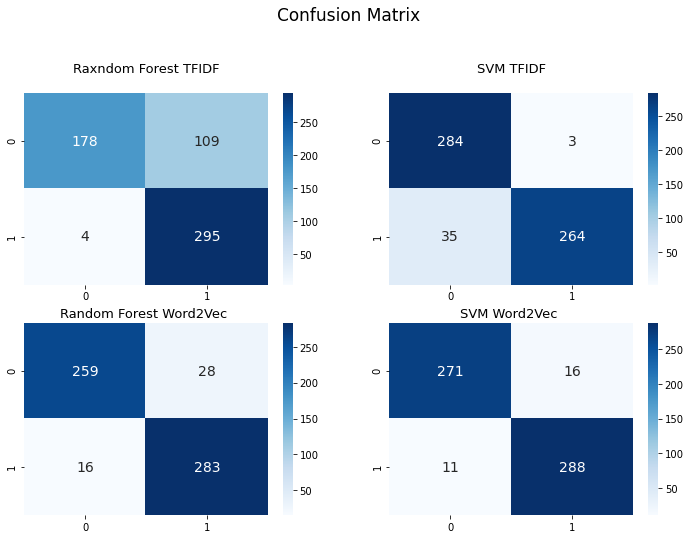

In [42]:
plt.figure(figsize=(12,12))
plt.suptitle("Confusion Matrix\n\n", fontsize=17)


plt.subplot(321)
plt.title(f'Raxndom Forest TFIDF\n ', fontsize=13)
sns.heatmap(cm1A, annot=True, 
            cmap='Blues',
            annot_kws={"size": 14},
            fmt='g')

plt.subplot(322)
plt.title(f'SVM TFIDF\n ',fontsize=13)
sns.heatmap(cm2A, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14})


plt.subplot(323)
plt.title(f'Random Forest Word2Vec ',fontsize=13)
sns.heatmap(cm1B, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14})

plt.subplot(324)
plt.title(f'SVM Word2Vec ',fontsize=13)
sns.heatmap(cm2B, 
            annot=True, 
            cmap='Blues',
            fmt='g',
            annot_kws={"size": 14})



plt.savefig('Confusion Matrix HeatMap')

plt.show()


In [35]:
cr1A['macro avg']['f1-score']


0.7991610733166115

In [44]:
M=['RF TFIDF','RF W2V','SVM TFIDF','SVM W2V']

perf_dict={'RF TFIDF': cr1A,'RF W2V':cr1B,'SVM TFIDF':cr2A,'SVM W2V':cr2B}

df=pd.DataFrame(perf_dict)

df


,RF TFIDF,RF W2V,SVM TFIDF,SVM W2V
0,"{'precision': 0.978021978021978, 'recall': 0.6...","{'precision': 0.9418181818181818, 'recall': 0....","{'precision': 0.890282131661442, 'recall': 0.9...","{'precision': 0.9609929078014184, 'recall': 0...."
1,"{'precision': 0.7301980198019802, 'recall': 0....","{'precision': 0.909967845659164, 'recall': 0.9...","{'precision': 0.9887640449438202, 'recall': 0....","{'precision': 0.9473684210526315, 'recall': 0...."
accuracy,0.807167,0.924915,0.935154,0.953925
macro avg,"{'precision': 0.8541099989119791, 'recall': 0....","{'precision': 0.9258930137386729, 'recall': 0....","{'precision': 0.9395230883026311, 'recall': 0....","{'precision': 0.954180664427025, 'recall': 0.9..."
weighted avg,"{'precision': 0.8515725522407845, 'recall': 0....","{'precision': 0.9255669010817547, 'recall': 0....","{'precision': 0.9405314355376042, 'recall': 0....","{'precision': 0.9540411645627028, 'recall': 0...."


In [45]:

print(f'\n\n                   Random Forest with TFIDF\n{cr1AA}')
print(f'\n\n\n               Support Vector Machine with TFIDF\n{cr2AA}')
print(f'\n\n\n                 Random Forest with Word2Vec\n{cr1BB}')
print(f'\n\n\n               Support Vector Machine with Word2Vec\n{cr2BB}')




                   Random Forest with TFIDF
              precision    recall  f1-score   support

           0       0.98      0.62      0.76       287
           1       0.73      0.99      0.84       299

    accuracy                           0.81       586
   macro avg       0.85      0.80      0.80       586
weighted avg       0.85      0.81      0.80       586




               Support Vector Machine with TFIDF
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       287
           1       0.99      0.88      0.93       299

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586




                 Random Forest with Word2Vec
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       287
           1       0.91      0.95      0.93       299

    accuracy                        

In [46]:
RF_TFIDF=pd.DataFrame(cr1A)
RF_TFIDF["model"]="RFTFIDF"
print(RF_TFIDF)

RF_W2V=pd.DataFrame(cr1B)
RF_W2V["model"]="RF_W2V"


SVM_TFIDF=pd.DataFrame(cr2A)
SVM_TFIDF["model"]="SVM_TFIDF"


SVM_W2V=pd.DataFrame(cr2B)
SVM_W2V["model"]="SVM_W2V"

performance=pd.concat([RF_TFIDF,SVM_TFIDF,RF_W2V,SVM_W2V])
#performance=performance.transpose()
performance.insert(0, 'Sr_no', range(1, 1+len(performance)))
performance['measure']=performance.index
performance=performance.set_index('Sr_no')
performance


#performance[performance['measure']=='f1-score']


                    0           1  accuracy   macro avg  weighted avg    model
precision    0.978022    0.730198  0.807167    0.854110      0.851573  RFTFIDF
recall       0.620209    0.986622  0.807167    0.803416      0.807167  RFTFIDF
f1-score     0.759062    0.839260  0.807167    0.799161      0.799982  RFTFIDF
support    287.000000  299.000000  0.807167  586.000000    586.000000  RFTFIDF


,0,1,accuracy,macro avg,weighted avg,model,measure
Sr_no,,,,,,,
1,0.978022,0.730198,0.807167,0.854110,0.851573,RFTFIDF,precision
2,0.620209,0.986622,0.807167,0.803416,0.807167,RFTFIDF,recall
3,0.759062,0.839260,0.807167,0.799161,0.799982,RFTFIDF,f1-score
4,287.000000,299.000000,0.807167,586.000000,586.000000,RFTFIDF,support
5,0.890282,0.988764,0.935154,0.939523,0.940531,SVM_TFIDF,precision
6,0.989547,0.882943,0.935154,0.936245,0.935154,SVM_TFIDF,recall
7,0.937294,0.932862,0.935154,0.935078,0.935033,SVM_TFIDF,f1-score
8,287.000000,299.000000,0.935154,586.000000,586.000000,SVM_TFIDF,support
9,0.941818,0.909968,0.924915,0.925893,0.925567,RF_W2V,precision


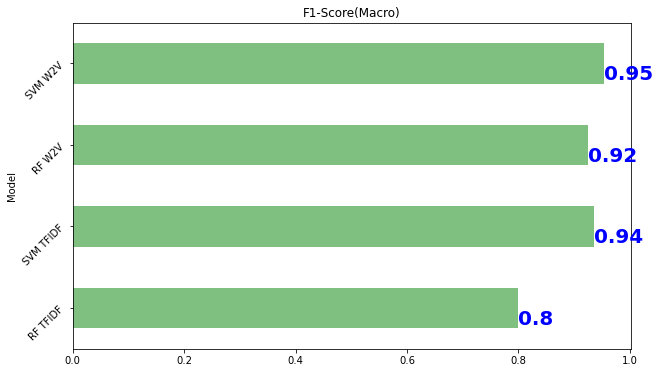

In [48]:
M=['RF TFIDF','SVM TFIDF','RF W2V','SVM W2V']

P=[cr1A['macro avg']['f1-score'],cr2A['macro avg']['f1-score'],cr1B['macro avg']['f1-score'],cr2B['macro avg']['f1-score']]

perf_dict={'Model':M,'Performance_F1_Score_Mac':P}

df=pd.DataFrame(perf_dict)

df.set_index('Model', inplace=True)

#print(df.sort_values(by='Performance_F1_Score_Mac'))

df.plot(kind='barh', rot=45, color='green', alpha=0.5, figsize=(10,6), legend=False)


width = 0.8
ind = np.arange(len(P))

for i, v in enumerate(P):
    plt.text(v, i-0.2, str(round(v,2)), 
            color = 'blue', fontweight = 'bold', fontsize=20)





plt.title('F1-Score(Macro)')



plt.show()

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import pickle

In [212]:
import pickle
with open('SVMmodel', 'wb') as f:
     pickle.dump(model1, f)

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [213]:
with open('SVMmodel', 'rb') as f:
    SVMmodel = pickle.load(f)


# Step 5: Topic Modelling

ASK SHIHAN for CODE FOR LDA AND VISUALISATION

# Step 6: Applying SAFE for Feature Extraction

Features Extracted

# Step 7: 